In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl


# Plotting Code for Cell-line Dilutions + Zero Purity (Sensitivity & Specificity)

## Fully clonal mixtures

In [2]:
cell_lines = ['CRL-5911', 'CRL-2314', 'CRL-5922']

##### Sensitivity with fully clonal mixtures

In [3]:
tmp_dfs = []
for cell_line in cell_lines:
    if cell_line in ['CRL-5922', 'CRL-2314']:
        tmp_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/validation.{0}_lohhla_sensitivity.csv'.format(cell_line),
                                             index_col=0)
    else:
        tmp_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/validation.{0}_lohhla_sensitivity.csv'.format(cell_line))
    print(cell_line, list(tmp_df.columns))
    tmp_dfs.append(tmp_df)
    
artificial_purities_raw_df = pd.concat(tmp_dfs)

#artificial_purities_raw_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v1/validation.cell_line_lohhla_sensitivity.csv')


artificial_purities_raw_df['LOH'] = True
artificial_purities_raw_df['real_purity'] = artificial_purities_raw_df['Sample'].str.split('_p').str[1].str.split('_').str[0].astype(int)

artificial_purities_raw_df['Sequenza_Loss'] = True
artificial_purities_raw_df.head()


CRL-5911 ['Sample', 'HLA_A_type1', 'HLA_A_type2', 'HLA_type1copyNum_withBAFBin', 'HLA_type2copyNum_withBAFBin', 'PVal_unique', 'LossAllele', 'KeptAllele', 'LOH_allele', 'LOHHLA_Loss', 'Purity', 'Ploidy']
CRL-2314 ['Sample', 'HLA_A_type1', 'HLA_A_type2', 'HLA_type1copyNum_withBAFBin', 'HLA_type2copyNum_withBAFBin', 'PVal_unique', 'LossAllele', 'KeptAllele', 'LOH_allele', 'LOHHLA_Loss', 'Purity', 'Ploidy']
CRL-5922 ['Sample', 'HLA_A_type1', 'HLA_A_type2', 'HLA_type1copyNum_withBAFBin', 'HLA_type2copyNum_withBAFBin', 'PVal_unique', 'LossAllele', 'KeptAllele', 'LOH_allele', 'LOHHLA_Loss', 'Purity', 'Ploidy']


,Sample,HLA_A_type1,HLA_A_type2,HLA_type1copyNum_withBAFBin,HLA_type2copyNum_withBAFBin,PVal_unique,LossAllele,KeptAllele,LOH_allele,LOHHLA_Loss,Purity,Ploidy,LOH,real_purity,Sequenza_Loss
0,DNA_VVV_S15_P10_9_tumor_p100_rep4,hla_b_07_02_01,hla_b_51_01_01,3.849064,0.000000,1.027994e-28,hla_b_51_01_01,hla_b_07_02_01,hla_b_51_01_01,True,1.00,5.0,True,100,True
1,DNA_VVV_S15_P10_9_tumor_p100_rep4,hla_c_07_02_01_01,hla_c_15_02_01,3.683698,0.000000,3.295002e-39,hla_c_15_02_01,hla_c_07_02_01_01,hla_c_15_02_01,True,1.00,5.0,True,100,True
2,DNA_VVV_S15_P10_9_tumor_p28_rep2,hla_b_07_02_01,hla_b_51_01_01,4.388693,0.269772,2.480268e-22,hla_b_51_01_01,hla_b_07_02_01,hla_b_51_01_01,True,0.15,5.0,True,28,True
3,DNA_VVV_S15_P10_9_tumor_p28_rep2,hla_c_07_02_01_01,hla_c_15_02_01,3.876131,-0.164530,2.267079e-25,hla_c_15_02_01,hla_c_07_02_01_01,hla_c_15_02_01,True,0.15,5.0,True,28,True
4,DNA_VVV_S15_P10_9_tumor_p10_rep10,hla_b_07_02_01,hla_b_51_01_01,1.750909,-0.556740,1.982009e-07,hla_b_51_01_01,hla_b_07_02_01,hla_b_51_01_01,True,0.10,2.0,True,10,True


In [4]:
artificial_purities_raw_df.groupby('real_purity').LOHHLA_Loss.mean()

real_purity
0      0.014286
1      0.028571
2      0.100000
3      0.171429
4      0.414286
5      0.471429
6      0.557143
7      0.657143
8      0.671429
9      0.700000
10     0.685714
12     0.685714
14     0.685714
15     0.671429
16     0.700000
18     0.700000
20     0.685714
21     0.757143
24     0.914286
25     0.885714
27     0.971429
28     0.942857
30     0.957143
32     0.985714
35     0.957143
36     0.985714
40     1.000000
42     1.000000
45     1.000000
48     1.000000
49     1.000000
50     1.000000
54     1.000000
56     0.971429
60     1.000000
63     1.000000
64     1.000000
70     0.971429
72     1.000000
80     0.971429
81     1.000000
90     1.000000
100    1.000000
Name: LOHHLA_Loss, dtype: float64

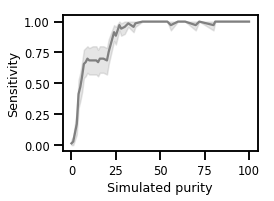

In [5]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['legend.numpoints'] = 1

artificial_purities_raw_df.groupby('real_purity').LOHHLA_Loss.mean()

plt.figure(figsize=(3.5, 2.5))
sns.set_context('talk', font_scale=0.7)

sns.lineplot(x='real_purity', y='LOHHLA_Loss', data=artificial_purities_raw_df, color='grey')

plt.xlabel('Simulated purity')
plt.ylabel('Sensitivity')
plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/LOHHLA.sensitivity.purity.line.all_cell_lines.pdf', bbox_inches='tight')

In [7]:
# Saving source data
panel_name = 'supp_figure_9c'
artificial_purities_raw_df[artificial_purities_raw_df.real_purity != 0][['real_purity', 'LOHHLA_Loss', 'LOH']].sort_values('real_purity').to_excel('/rnd/users/rpyke/data/00-DASH/manuscript_source_data/{0}.xlsx'.format(panel_name),
                                 index=None)

## Sensitivity across variable clonalities - Inflated Cell-line dilutions (Sensitivity Heatmap)

In [8]:
# For us, the adjust purity is just the normal purity
tmp_dfs = []
for cell_line in cell_lines:
    if cell_line in ['CRL-5922', 'CRL-2314']:
        tmp_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/validation.{0}_lohhla_sensitivity_with_clonality_adjustments.csv'.format(cell_line),
                                             index_col=0)
    else:
        tmp_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/validation.{0}_lohhla_sensitivity_with_clonality_adjustments.csv'.format(cell_line))
    print(cell_line, list(tmp_df.columns))
    tmp_dfs.append(tmp_df)
    
inflated_purities_all_df = pd.concat(tmp_dfs)

inflated_purities_all_df['real_purity'] = inflated_purities_all_df['Sample'].str.split('_p').str[1].str.split('_').str[0].astype(int)
inflated_purities_all_df['cell_line'] = inflated_purities_all_df['Sample'].str.split('_tumor').str[0]

inflated_purities_all_df.head()


CRL-5911 ['Sample', 'HLA_A_type1', 'HLA_A_type2', 'HLA_type1copyNum_withBAFBin', 'HLA_type2copyNum_withBAFBin', 'PVal_unique', 'LossAllele', 'KeptAllele', 'HLAtype1Log2MedianCoverage', 'HLAtype2Log2MedianCoverage', 'purity', 'ploidy', 'LOH_allele', 'LOHHLA_Loss']
CRL-2314 ['Sample', 'HLA_A_type1', 'HLA_A_type2', 'HLA_type1copyNum_withBAFBin', 'HLA_type2copyNum_withBAFBin', 'PVal_unique', 'LossAllele', 'KeptAllele', 'HLAtype1Log2MedianCoverage', 'HLAtype2Log2MedianCoverage', 'purity', 'ploidy', 'LOH_allele', 'LOHHLA_Loss']
CRL-5922 ['Sample', 'HLA_A_type1', 'HLA_A_type2', 'HLA_type1copyNum_withBAFBin', 'HLA_type2copyNum_withBAFBin', 'PVal_unique', 'LossAllele', 'KeptAllele', 'HLAtype1Log2MedianCoverage', 'HLAtype2Log2MedianCoverage', 'purity', 'ploidy', 'LOH_allele', 'LOHHLA_Loss']


,Sample,HLA_A_type1,HLA_A_type2,HLA_type1copyNum_withBAFBin,HLA_type2copyNum_withBAFBin,PVal_unique,LossAllele,KeptAllele,HLAtype1Log2MedianCoverage,HLAtype2Log2MedianCoverage,purity,ploidy,LOH_allele,LOHHLA_Loss,real_purity,cell_line
0,DNA_VVV_S15_P10_9_tumor_p28_rep2,hla_b_07_02_01,hla_b_51_01_01,3.883982,0.865751,2.480268e-22,hla_b_51_01_01,hla_b_07_02_01,0.242642,-0.473975,0.223,5.0,NaN,False,28,DNA_VVV_S15_P10_9
1,DNA_VVV_S15_P10_9_tumor_p28_rep2,hla_c_07_02_01_01,hla_c_15_02_01,3.508391,0.547507,2.267079e-25,hla_c_15_02_01,hla_c_07_02_01_01,0.192601,-0.482873,0.223,5.0,NaN,False,28,DNA_VVV_S15_P10_9
2,DNA_VVV_S15_P10_9_tumor_p28_rep2,hla_b_07_02_01,hla_b_51_01_01,3.326220,1.516650,2.480268e-22,hla_b_51_01_01,hla_b_07_02_01,0.258454,-0.478776,0.476,5.0,NaN,False,28,DNA_VVV_S15_P10_9
3,DNA_VVV_S15_P10_9_tumor_p28_rep2,hla_c_07_02_01_01,hla_c_15_02_01,3.106763,1.325158,2.267079e-25,hla_c_15_02_01,hla_c_07_02_01_01,0.192601,-0.485471,0.476,5.0,NaN,False,28,DNA_VVV_S15_P10_9
4,DNA_VVV_S15_P10_9_tumor_p10_rep10,hla_b_07_02_01,hla_b_51_01_01,2.252697,-0.060447,1.982009e-07,hla_b_51_01_01,hla_b_07_02_01,0.031694,-0.203305,0.105,3.0,hla_b_51_01_01,True,10,DNA_VVV_S15_P10_9


### Reverse engineer getting the correct clonality & purity bucket from the stated pXX and the inflated p-value

##### Failing because these weren't created with the right adjustments??

In [9]:
inflated_purities_SP_clonality_df_tmps = []

for cell_line in cell_lines: 
    print(cell_line)

    # purity conversions - how to inflate
    purity_conversion_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/validation.{0}_sequenza_conversions.csv'.format(cell_line), sep='\t')
    
    # How we calculated to begin with
    # Get purity adjustments
    purity_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    clonality_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

    IPSLC_SeqIPSLC_dict = {}
    IPSLC_SeqIPSLC_list = []

    # **** Account for ploidy & add to tuple list ****

    # Cycle through all potential combinations
    for SP in purity_values:
        for clonality in clonality_values:
            IPSLC = (SP*clonality)/100
            if IPSLC == 1:
                SeqIPSLC = 0.1
            else:
                SeqIPSLC = round(purity_conversion_df[purity_conversion_df['SP'] == SP/100]['SeqSP'].mean(), 3)

            adjusted_ploidy = round(purity_conversion_df[purity_conversion_df['SP'] == SP/100]['SeqPloidy'].mean())

            IPSLC_SeqIPSLC_list.append((IPSLC, SeqIPSLC, adjusted_ploidy, SP, clonality))

    purity_conversion_RE_df = pd.DataFrame(data=IPSLC_SeqIPSLC_list, columns=['IPSLC', 'SeqIPSLC', 'adjusted_ploidy', 'SP', 'clonality'])


    # Add mapped SP and clonality values to dataframe
    inflated_purities_SP_clonality_df = inflated_purities_all_df[inflated_purities_all_df.cell_line == cell_line].copy()

    inflated_purities_list = list(round(inflated_purities_SP_clonality_df.purity,3))
    inflated_purities_real_purity_list = list(inflated_purities_SP_clonality_df.real_purity)

    SP_list = []
    clonality_list = []

    for inflated_purity, real_purity in zip(inflated_purities_list, inflated_purities_real_purity_list):
        #print(inflated_purity, real_purity)
        SP = purity_conversion_RE_df[(purity_conversion_RE_df.IPSLC == real_purity) & np.isclose(purity_conversion_RE_df.SeqIPSLC, inflated_purity, 0.001)]['SP'].iloc[0]
        clonality = purity_conversion_RE_df[(purity_conversion_RE_df.IPSLC == real_purity) & np.isclose(purity_conversion_RE_df.SeqIPSLC, inflated_purity, 0.001)]['clonality'].iloc[0]

    #     print(SP, clonality)
        SP_list.append(SP)
        clonality_list.append(clonality)

    inflated_purities_SP_clonality_df['SP'] = SP_list
    inflated_purities_SP_clonality_df['clonality'] = clonality_list

    #inflated_purities_SP_clonality_df.to_csv("/rnd/users/sdea/03-lohhla/readdata/inflated_purity_extracted_SP_clonality.csv")
    inflated_purities_SP_clonality_df_tmps.append(inflated_purities_SP_clonality_df)
    
inflated_purities_SP_clonality_df = pd.concat(inflated_purities_SP_clonality_df_tmps)


CRL-5911
CRL-2314
CRL-5922


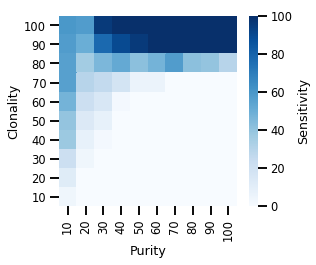

In [10]:
# Try and group by SP and clonality
tmp_df =  pd.DataFrame(inflated_purities_SP_clonality_df.groupby(['SP', 'clonality']).LOHHLA_Loss.mean().reset_index())
tmp_df.columns = ['SP', 'clonality', 'LOHHLA_Accuracy']
tmp_df

purities = list(range(10, 110, 10))
clonalities = list(range(10, 110, 10))

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['legend.numpoints'] = 1

# flip purity onto y axis 
sns.set_context('talk', font_scale=0.7)
plt.figure(figsize=(4, 3.5))
accuracy_matrix = []
for clonality in clonalities[::-1]:
    accuracy_array = []  
    for purity in purities:
        try:
#             print(purity, clonality)
            accuracy = list(tmp_df[(tmp_df.SP == purity) & (tmp_df.clonality == clonality)].LOHHLA_Accuracy)[0] * 100
#             print(accuracy)
            accuracy_array.append(accuracy)
        except:
            accuracy_array.append(np.nan)
    accuracy_matrix.append(accuracy_array)

sns.heatmap(accuracy_matrix, xticklabels=purities, yticklabels=clonalities[::-1], cmap="Blues",
           vmin=0, vmax=100, cbar_kws={'label': 'Sensitivity'}) #, annot=True, fmt='g')
plt.xlabel('Purity')
plt.ylabel('Clonality')
plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/LOHHLA.sensitivity.purity_clonality.heatmap.lenient.blues_r.all_cell_lines.pdf',
           bbox_inches='tight')

In [11]:
accuracy_matrix

[[60.0,
  57.99999999999999,
  96.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0],
 [57.99999999999999,
  50.0,
  78.0,
  90.0,
  96.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0],
 [56.00000000000001,
  36.0,
  46.0,
  52.0,
  42.0,
  48.0,
  57.99999999999999,
  42.0,
  40.0,
  30.0],
 [56.00000000000001, 30.0, 26.0, 18.0, 6.0, 6.0, 0.0, 0.0, 0.0, 0.0],
 [48.0, 22.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [40.0, 14.000000000000002, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [38.0, 8.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [22.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

In [12]:
accuracy_df = pd.DataFrame(accuracy_matrix)
accuracy_df.columns = ['Purity-{0}'.format(x) for x in purities]
accuracy_df.index = ['Clonality-{0}'.format(x) for x in clonalities[::-1]]

In [13]:
# Saving source data
panel_name = 'supp_figure_9f'
accuracy_df.to_excel('/rnd/users/rpyke/data/00-DASH/manuscript_source_data/{0}.xlsx'.format(panel_name),
                                 index=None)

## Specificity with full clonality (Line-plot)

In [14]:
tmp_dfs = []
for cell_line in cell_lines:
    if cell_line in ['CRL-5922', 'CRL-2314']:
        tmp_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/validation.{0}_lohhla_specificity.csv'.format(cell_line),
                                             index_col=0)
    else:
        tmp_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/validation.{0}_lohhla_specificity.csv'.format(cell_line))
    print(cell_line, list(tmp_df.columns))
    tmp_dfs.append(tmp_df)
    
artificial_purities_raw_df = pd.concat(tmp_dfs)

artificial_purities_raw_df['LOH'] = True
artificial_purities_raw_df['real_purity'] = artificial_purities_raw_df['Sample'].str.split('_p').str[1].str.split('_').str[0].astype(int)

# Fixing purity
artificial_purities_raw_df['old_purity'] = artificial_purities_raw_df['Purity']

artificial_purities_raw_df.head()

CRL-5911 ['Sample', 'HLA_A_type1', 'HLA_A_type2', 'HLA_type1copyNum_withBAFBin', 'HLA_type2copyNum_withBAFBin', 'PVal_unique', 'LossAllele', 'KeptAllele', 'LOH_allele', 'LOHHLA_Loss', 'Purity', 'Ploidy']
CRL-2314 ['Sample', 'HLA_A_type1', 'HLA_A_type2', 'HLA_type1copyNum_withBAFBin', 'HLA_type2copyNum_withBAFBin', 'PVal_unique', 'LossAllele', 'KeptAllele', 'LOH_allele', 'LOHHLA_Loss', 'Purity', 'Ploidy']
CRL-5922 ['Sample', 'HLA_A_type1', 'HLA_A_type2', 'HLA_type1copyNum_withBAFBin', 'HLA_type2copyNum_withBAFBin', 'PVal_unique', 'LossAllele', 'KeptAllele', 'LOH_allele', 'LOHHLA_Loss', 'Purity', 'Ploidy']


,Sample,HLA_A_type1,HLA_A_type2,HLA_type1copyNum_withBAFBin,HLA_type2copyNum_withBAFBin,PVal_unique,LossAllele,KeptAllele,LOH_allele,LOHHLA_Loss,Purity,Ploidy,LOH,real_purity,old_purity
0,DNA_VVV_S15_P10_9_tumor_p0_rep1_4,hla_b_07_02_01,hla_b_51_01_01,0.998497,0.989843,0.027355,hla_b_51_01_01,hla_b_07_02_01,NaN,False,4,5,True,0,4
1,DNA_VVV_S15_P10_9_tumor_p0_rep1_4,hla_c_07_02_01_01,hla_c_15_02_01,0.981784,0.977126,0.110290,hla_c_07_02_01_01,hla_c_15_02_01,NaN,False,4,5,True,0,4
2,DNA_VVV_S15_P10_9_tumor_p0_rep1_49,hla_b_07_02_01,hla_b_51_01_01,0.999877,0.999171,0.027355,hla_b_51_01_01,hla_b_07_02_01,NaN,False,49,5,True,0,49
3,DNA_VVV_S15_P10_9_tumor_p0_rep1_49,hla_c_07_02_01_01,hla_c_15_02_01,0.998513,0.998133,0.110290,hla_c_07_02_01_01,hla_c_15_02_01,NaN,False,49,5,True,0,49
4,DNA_VVV_S15_P10_9_tumor_p0_rep1_80,hla_b_07_02_01,hla_b_51_01_01,0.999925,0.999492,0.027355,hla_b_51_01_01,hla_b_07_02_01,NaN,False,80,5,True,0,80


In [23]:
tmp_df = pd.DataFrame(artificial_purities_raw_df)
tmp_df = tmp_df.dropna(subset=['LOHHLA_Loss'])
tmp_df.LOHHLA_Loss.unique()
tmp_df['HLA_LOH_Loss_int'] = tmp_df['LOHHLA_Loss'].astype(int)
tmp_df['HLA_LOH_Loss_int'] = 1 - tmp_df['HLA_LOH_Loss_int']


In [24]:
tmp_df[['old_purity', 'HLA_LOH_Loss_int', 'LOH']]

,old_purity,HLA_LOH_Loss_int,LOH
0,4,1,True
1,4,1,True
2,49,1,True
3,49,1,True
4,80,1,True
5,80,1,True
6,40,1,True
7,40,1,True
8,25,1,True
9,25,1,True


In [25]:
tmp_df2 = pd.DataFrame(tmp_df.groupby('old_purity').HLA_LOH_Loss_int.mean().reset_index())
tmp_df2.head()

,old_purity,HLA_LOH_Loss_int
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [26]:
tmp_df2.dtypes

old_purity          object
HLA_LOH_Loss_int     int64
dtype: object

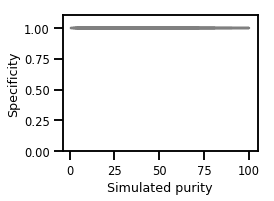

In [27]:
plt.figure(figsize=(3.5, 2.5))
sns.set_context('talk', font_scale=0.7)

sns.lineplot(x='old_purity', y='HLA_LOH_Loss_int', data=tmp_df2, color='grey')
plt.ylim(0, 1.1)
plt.xlabel('Simulated purity')
plt.ylabel('Specificity')
#plt.title('DASH')
plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/LOHHLA.specificity.zero_purity.line.all_cell_lines.pdf', bbox_inches='tight')

In [30]:
# Saving source data
panel_name = 'supp_figure_9d'
tmp_df['old_purity'] = tmp_df['old_purity'].astype(int)
tmp_df[['old_purity', 'HLA_LOH_Loss_int', 'LOH']].sort_values('old_purity').to_excel('/rnd/users/rpyke/data/00-DASH/manuscript_source_data/{0}.xlsx'.format(panel_name),
                                 index=None)

# Purity + clonality Specificity (specificity heatmap)

In [31]:
tmp_dfs = []
for cell_line in cell_lines:
    if cell_line in ['CRL-5922', 'CRL-2314']:
        tmp_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/validation.{0}_lohhla_specificity_with_clonality_adjustments.csv'.format(cell_line),
                                             index_col=0)
    else:
        tmp_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/validation.{0}_lohhla_specificity_with_clonality_adjustments.csv'.format(cell_line))
    print(cell_line, list(tmp_df.columns))
    tmp_dfs.append(tmp_df)
    
inflated_zero_purities_df = pd.concat(tmp_dfs)




#inflated_zero_purities_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v1/validation.cell_line_lohhla_specificity_with_clonality_adjustments.csv')


# get the old purities from the name of the sample & convert to int
inflated_zero_purities_df['old_purity'] = inflated_zero_purities_df['Sample'].str.split("_").str[-1]
inflated_zero_purities_df['old_purity'] = pd.to_numeric(inflated_zero_purities_df['old_purity'], downcast='signed')
inflated_zero_purities_df.old_purity.unique()


CRL-5911 ['Sample', 'HLA_A_type1', 'HLA_A_type2', 'HLA_type1copyNum_withBAFBin', 'HLA_type2copyNum_withBAFBin', 'PVal_unique', 'LossAllele', 'KeptAllele', 'HLAtype1Log2MedianCoverage', 'HLAtype2Log2MedianCoverage', 'purity', 'ploidy', 'LOH_allele', 'LOHHLA_Loss']
CRL-2314 ['Sample', 'HLA_A_type1', 'HLA_A_type2', 'HLA_type1copyNum_withBAFBin', 'HLA_type2copyNum_withBAFBin', 'PVal_unique', 'LossAllele', 'KeptAllele', 'HLAtype1Log2MedianCoverage', 'HLAtype2Log2MedianCoverage', 'purity', 'ploidy', 'LOH_allele', 'LOHHLA_Loss']
CRL-5922 ['Sample', 'HLA_A_type1', 'HLA_A_type2', 'HLA_type1copyNum_withBAFBin', 'HLA_type2copyNum_withBAFBin', 'PVal_unique', 'LossAllele', 'KeptAllele', 'HLAtype1Log2MedianCoverage', 'HLAtype2Log2MedianCoverage', 'purity', 'ploidy', 'LOH_allele', 'LOHHLA_Loss']


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  12,  14,  16,
        18,  20,  15,  21,  24,  27,  30,  28,  32,  36,  40,  25,  35,
        45,  50,  42,  48,  54,  60,  49,  56,  63,  70,  64,  72,  80,
        81,  90, 100])

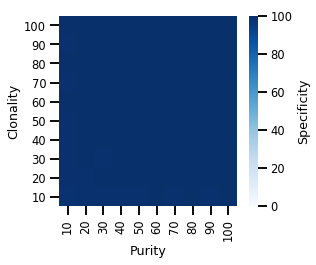

In [32]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['legend.numpoints'] = 1

purities = list(range(10, 110, 10))
clonalities = list(range(10, 110, 10))

tmp_df = pd.DataFrame(inflated_zero_purities_df.groupby('old_purity').LOHHLA_Loss.mean()).reset_index()
tmp_df.columns = ['simulated_purity', 'LOHHLA_Accuracy']
tmp_df['LOHHLA_Specificity'] = 1 - tmp_df.LOHHLA_Accuracy # Inverted for specificity (these are negatives)

# print(tmp_df)

sns.set_context('talk', font_scale=0.7)
plt.figure(figsize=(4, 3.5))
accuracy_matrix = []
for purity in purities[::-1]:
    accuracy_array = []
    for clonality in clonalities:
        try:
            accuracy_array.append(list(tmp_df[tmp_df.simulated_purity == 
                                              int(clonality*purity / 100)].LOHHLA_Specificity)[0] * 100)
        except:
            accuracy_array.append(np.nan)
    accuracy_matrix.append(accuracy_array)

sns.heatmap(accuracy_matrix, xticklabels=purities, yticklabels=clonalities[::-1], cmap="Blues",
           vmin=0, vmax=100, cbar_kws={'label': 'Specificity'}) #, annot=True, fmt='g')
plt.xlabel('Purity')
plt.ylabel('Clonality')
#plt.title('Updated Algorithm')
plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/LOHHLA.specificity.purity_clonality.heatmap.lenient.blues_r.all_cell_lines.pdf',
           bbox_inches='tight')

In [33]:
accuracy_matrix

[[99.64285714285714,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0],
 [99.52380952380952,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0],
 [99.64285714285714,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0],
 [99.28571428571429,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0],
 [99.64285714285714,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0],
 [99.28571428571429,
  99.64285714285714,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0],
 [99.52380952380952,
  99.64285714285714,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0],
 [99.28571428571429,
  99.64285714285714,
  99.52380952380952,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0],
 [99.28571428571429,
  99.52380952380952,
  99.64285714285714,
  99.64285714285714,
  99.64285714285714,
  100.0,
  100.0,
  100

In [34]:
accuracy_df = pd.DataFrame(accuracy_matrix)
accuracy_df.columns = ['Purity-{0}'.format(x) for x in purities]
accuracy_df.index = ['Clonality-{0}'.format(x) for x in clonalities[::-1]]

In [35]:
# Saving source data
panel_name = 'supp_figure_9e'
accuracy_df.to_excel('/rnd/users/rpyke/data/00-DASH/manuscript_source_data/{0}.xlsx'.format(panel_name),
                                 index=None)